# Feature Engineering Assignment


## 1. What is a parameter?

A **parameter** is a configurable variable that defines the behavior of a machine learning model. Parameters are learned from the training data during the model fitting process.

**Types of Parameters:**
- **Model Parameters**: Learned from data (e.g., weights in linear regression, coefficients)
- **Hyperparameters**: Set before training (e.g., learning rate, number of epochs)

**Example**: In linear regression y = mx + b, 'm' (slope) and 'b' (intercept) are parameters that the model learns from training data.

## 2. What is correlation?

**Correlation** measures the strength and direction of a linear relationship between two variables. It ranges from -1 to +1.

**Types of Correlation:**
- **Positive Correlation (+1)**: As one variable increases, the other increases
- **Negative Correlation (-1)**: As one variable increases, the other decreases
- **No Correlation (0)**: No linear relationship between variables

**Correlation Coefficient (Pearson's r)**: Most common measure of linear correlation.

## 3. What does negative correlation mean?

**Negative correlation** indicates an inverse relationship between two variables. When one variable increases, the other tends to decrease, and vice versa.

**Examples:**
- Temperature vs. Heating bills (higher temperature → lower heating costs)
- Study time vs. Error rate (more study time → fewer errors)
- Speed vs. Travel time (higher speed → less time taken)

**Range**: -1 to 0, where -1 indicates perfect negative correlation.

## 4. Define Machine Learning. What are the main components?

**Machine Learning** is a subset of artificial intelligence that enables computers to learn and make decisions from data without being explicitly programmed for every task.

**Main Components:**
1. **Data**: Input information used for training
2. **Algorithm**: Mathematical model that finds patterns
3. **Features**: Individual measurable properties of observed phenomena
4. **Model**: The output of an algorithm after training on data
5. **Training**: Process of teaching the algorithm using historical data
6. **Evaluation**: Testing model performance on unseen data
7. **Prediction**: Using the trained model to make forecasts on new data

## 5. How does loss value help in determining model quality?

**Loss value** (or cost function) quantifies the difference between predicted and actual values. It serves as a measure of model performance.

**How it helps:**
- **Lower loss** = Better model performance
- **Higher loss** = Poor model performance
- **Optimization**: Algorithms minimize loss during training
- **Comparison**: Compare different models objectively

**Common Loss Functions:**
- **Mean Squared Error (MSE)**: For regression problems
- **Cross-entropy**: For classification problems
- **Mean Absolute Error (MAE)**: For regression with outliers

## 6. What are continuous and categorical variables?

**Continuous Variables:**
- Can take any numerical value within a range
- Infinitely many possible values
- Examples: Height, weight, temperature, salary, age
- Mathematical operations are meaningful

**Categorical Variables:**
- Represent categories or groups
- Limited set of possible values
- Two types:
  - **Nominal**: No inherent order (color, gender, city)
  - **Ordinal**: Has natural order (education level, rating scale)
- Examples: Gender, color, brand, country, grade

## 7. How do we handle categorical variables in ML? Common techniques?

Machine learning algorithms typically work with numerical data, so categorical variables need encoding.

**Common Techniques:**

1. **Label Encoding**: Assign numerical labels (0, 1, 2, ...)
   - Good for: Ordinal data
   - Issue: May imply false ordering

2. **One-Hot Encoding**: Create binary columns for each category
   - Good for: Nominal data
   - Issue: High dimensionality with many categories

3. **Target Encoding**: Replace categories with target variable statistics
   - Good for: High cardinality features
   - Issue: Risk of overfitting

4. **Binary Encoding**: Convert to binary representation
   - Good for: High cardinality with fewer dimensions than one-hot

In [1]:
# Essential code for handling categorical variables
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Sample data
data = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue'],
    'size': ['small', 'medium', 'large', 'small', 'large']
})

# Label Encoding
le = LabelEncoder()
data['color_encoded'] = le.fit_transform(data['color'])

# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['color'], prefix='color')

print("Original Data:")
print(data)
print("\nOne-Hot Encoded:")
print(data_encoded)

Original Data:
   color    size  color_encoded
0    red   small              2
1   blue  medium              0
2  green   large              1
3    red   small              2
4   blue   large              0

One-Hot Encoded:
     size  color_encoded  color_blue  color_green  color_red
0   small              2       False        False       True
1  medium              0        True        False      False
2   large              1       False         True      False
3   small              2       False        False       True
4   large              0        True        False      False


## 8. What do you mean by training and testing a dataset?

**Training and Testing** is the fundamental approach to evaluate machine learning models.

**Training:**
- Use portion of data to teach the model
- Model learns patterns and relationships
- Algorithm adjusts parameters to minimize error
- Typically 70-80% of total data

**Testing:**
- Use remaining data to evaluate model performance
- Data the model has never seen before
- Provides unbiased estimate of model accuracy
- Typically 20-30% of total data

**Purpose**: Prevent overfitting and ensure model generalizes well to new, unseen data.

## 9. What is sklearn.preprocessing?

**sklearn.preprocessing** is a module in scikit-learn that provides utilities for data preprocessing and feature engineering.

**Key Functions:**
- **StandardScaler**: Standardize features (mean=0, std=1)
- **MinMaxScaler**: Scale features to a given range
- **LabelEncoder**: Encode categorical labels as integers
- **OneHotEncoder**: Encode categorical features as one-hot vectors
- **PolynomialFeatures**: Generate polynomial features
- **Imputer**: Handle missing values

**Purpose**: Transform raw data into format suitable for machine learning algorithms.

## 10. What is a Test set?

A **Test set** is a portion of the dataset that is kept separate and used only for final evaluation of the trained model.

**Characteristics:**
- Never used during training
- Provides unbiased performance estimate
- Should be representative of real-world data
- Typically 20-30% of total dataset

**Three-way split:**
- **Training Set** (60-70%): Train the model
- **Validation Set** (15-20%): Tune hyperparameters
- **Test Set** (15-20%): Final evaluation

**Importance**: Ensures model performance assessment is realistic and unbiased.

## 11. How do we split data for model fitting in Python?

Data splitting is crucial for proper model evaluation and preventing overfitting.

In [2]:
# Essential code for data splitting
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Sample dataset
X = np.random.randn(1000, 4)  # Features
y = np.random.randint(0, 2, 1000)  # Target

# Basic train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Three-way split (60-20-20)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 600
Validation set size: 200
Test set size: 200


## 12. How do you approach a Machine Learning problem?

**Systematic Approach to ML Problems:**

1. **Problem Definition**
   - Understand business objective
   - Define success metrics
   - Determine problem type (classification/regression)

2. **Data Collection & Understanding**
   - Gather relevant data
   - Understand data structure and quality
   - Identify missing values and outliers

3. **Exploratory Data Analysis (EDA)**
   - Visualize data distributions
   - Find correlations and patterns
   - Identify feature importance

4. **Data Preprocessing**
   - Handle missing values
   - Encode categorical variables
   - Scale numerical features
   - Feature selection/engineering

5. **Model Selection & Training**
   - Choose appropriate algorithms
   - Train multiple models
   - Cross-validation

6. **Model Evaluation**
   - Use appropriate metrics
   - Test on unseen data
   - Compare model performance

7. **Model Deployment & Monitoring**
   - Deploy to production
   - Monitor performance
   - Retrain when necessary

## 13. Why perform EDA before fitting a model?

**Exploratory Data Analysis (EDA)** is crucial for understanding your data before building models.

**Key Benefits:**

1. **Data Quality Assessment**
   - Identify missing values, outliers, inconsistencies
   - Understand data distribution and patterns

2. **Feature Understanding**
   - Discover relationships between variables
   - Identify important features for prediction
   - Find redundant or irrelevant features

3. **Model Selection Guidance**
   - Understand if data is linear or non-linear
   - Choose appropriate algorithms
   - Set realistic performance expectations

4. **Preprocessing Decisions**
   - Determine scaling requirements
   - Decide on encoding strategies
   - Plan feature engineering approaches

5. **Bias Detection**
   - Identify potential data biases
   - Ensure representative sampling
   - Check for class imbalances

## 14-15. Correlation (Repeated)

*Refer to questions 2 and 3 for detailed explanations of correlation and negative correlation.*

## 16. How to find correlation between variables in Python?

Correlation Matrix:
          height    weight       age       bmi
height  1.000000 -0.136422  0.097139 -0.568433
weight -0.136422  1.000000 -0.042284  0.884446
age     0.097139 -0.042284  1.000000 -0.067045
bmi    -0.568433  0.884446 -0.067045  1.000000

Height-Weight Correlation: -0.136 (p-value: 0.176)
Height-BMI Spearman Correlation: -0.516


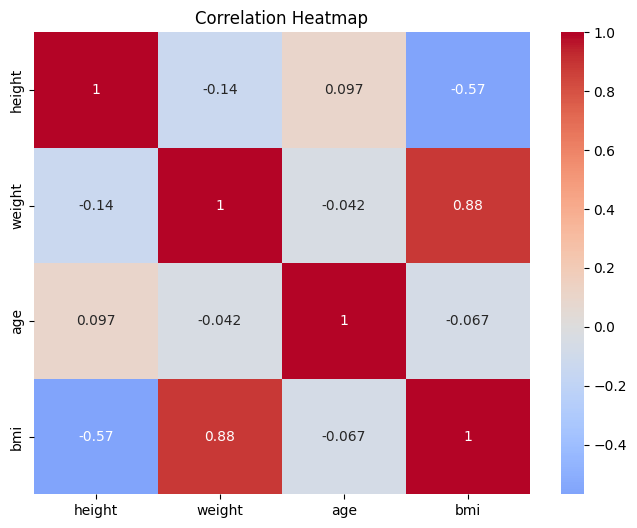

In [3]:
# Essential code for finding correlation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Sample data
np.random.seed(42)
data = pd.DataFrame({
    'height': np.random.normal(170, 10, 100),
    'weight': np.random.normal(70, 15, 100),
    'age': np.random.randint(18, 65, 100)
})

# Add correlated variable
data['bmi'] = data['weight'] / (data['height']/100)**2

# Method 1: Pandas correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Method 2: Specific correlation between two variables
corr_coeff, p_value = pearsonr(data['height'], data['weight'])
print(f"\nHeight-Weight Correlation: {corr_coeff:.3f} (p-value: {p_value:.3f})")

# Method 3: Spearman correlation (for non-linear relationships)
spearman_corr, _ = spearmanr(data['height'], data['bmi'])
print(f"Height-BMI Spearman Correlation: {spearman_corr:.3f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## 17. What is causation? Difference between correlation and causation?

**Causation** means one event directly causes another event to occur.

**Key Differences:**

| Aspect | Correlation | Causation |
|--------|-------------|----------|
| Definition | Statistical relationship | Direct cause-effect relationship |
| Direction | Can be bidirectional | Unidirectional (cause → effect) |
| Implication | Variables move together | One variable influences another |
| Proof | Mathematical calculation | Requires controlled experiments |

**Example:**
- **Correlation**: Ice cream sales and drowning incidents are positively correlated
- **Causation**: Hot weather causes both increased ice cream sales AND more swimming (leading to drowning incidents)
- **Conclusion**: Ice cream sales don't cause drowning; both are caused by temperature

**Remember**: "Correlation does not imply causation" - just because two variables are correlated doesn't mean one causes the other.

## 18. What is an Optimizer? Types of optimizers?

An **Optimizer** is an algorithm that adjusts model parameters to minimize the loss function during training.

**Common Optimizers:**

1. **Gradient Descent (GD)**
   - Uses entire dataset for each update
   - Slow but stable convergence
   - Example: Linear regression with large datasets

2. **Stochastic Gradient Descent (SGD)**
   - Uses one sample at a time
   - Fast but noisy updates
   - Example: Online learning scenarios

3. **Mini-batch Gradient Descent**
   - Uses small batches of data
   - Balance between speed and stability
   - Example: Most deep learning applications

4. **Adam (Adaptive Moment Estimation)**
   - Combines momentum and adaptive learning rates
   - Generally good default choice
   - Example: Neural networks, deep learning

5. **RMSprop**
   - Adapts learning rate for each parameter
   - Good for non-stationary objectives
   - Example: Recurrent neural networks

## 19. What is sklearn.linear_model?

**sklearn.linear_model** is a module in scikit-learn that implements various linear models for regression and classification.

**Key Classes:**
- **LinearRegression**: Ordinary least squares regression
- **LogisticRegression**: Logistic regression for classification
- **Ridge**: Ridge regression (L2 regularization)
- **Lasso**: Lasso regression (L1 regularization)
- **ElasticNet**: Combination of Ridge and Lasso
- **SGDRegressor**: Linear regression with SGD

**Purpose**: Provide implementation of linear models that assume linear relationship between features and target variable.

## 20. What does model.fit() do? Required arguments?

**model.fit()** trains the machine learning model on the provided training data.

**What it does:**
- Learns patterns from training data
- Adjusts model parameters (weights, coefficients)
- Minimizes the loss function
- Stores learned parameters in the model object

**Required Arguments:**
- **X**: Feature matrix (training data)
  - Shape: (n_samples, n_features)
  - Can be numpy array, pandas DataFrame, or sparse matrix
- **y**: Target vector (labels/values)
  - Shape: (n_samples,) or (n_samples, n_targets)
  - Can be numpy array or pandas Series

**Optional Arguments** (vary by model):
- **sample_weight**: Individual weights for samples
- **eval_set**: Validation data for early stopping
- **verbose**: Control training output

In [ ]:
# Essential code for model.fit()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Sample data
X = np.random.randn(100, 3)  # 100 samples, 3 features
y = X @ [1.5, -2.0, 0.5] + np.random.randn(100) * 0.1  # Linear relationship + noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit model
model = LinearRegression()
model.fit(X_train, y_train)  # Required: X (features), y (target)

print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")
print(f"Training score: {model.score(X_train, y_train):.3f}")

## 21. What does model.predict() do? Required arguments?

**model.predict()** uses the trained model to make predictions on new, unseen data.

**What it does:**
- Applies learned parameters to new data
- Generates predictions based on input features
- Returns predicted values/classes
- Does not modify the model (inference only)

**Required Arguments:**
- **X**: Feature matrix for prediction
  - Shape: (n_samples, n_features)
  - Must have same number of features as training data
  - Can be single sample or multiple samples

**Returns:**
- **Regression**: Continuous values (e.g., prices, temperatures)
- **Classification**: Class labels (e.g., 0/1, 'cat'/'dog')

**Related Methods:**
- **predict_proba()**: Returns prediction probabilities (classification)
- **predict_log_proba()**: Returns log probabilities
- **decision_function()**: Returns decision scores

In [ ]:
# Essential code for model.predict()
# Using the model from previous example

# Make predictions on test set
y_pred = model.predict(X_test)  # Required: X (features for prediction)

# Make prediction on single sample
single_sample = np.array([[1.0, -0.5, 2.0]])  # Must be 2D array
single_prediction = model.predict(single_sample)

print(f"Test predictions (first 5): {y_pred[:5]}")
print(f"Actual values (first 5): {y_test[:5]}")
print(f"Single sample prediction: {single_prediction[0]:.3f}")

# Evaluate predictions
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

## 22. Continuous and Categorical Variables (Repeated)

*Refer to question 6 for detailed explanation of continuous and categorical variables.*

## 23. What is feature scaling? How does it help in ML?

**Feature Scaling** is the process of normalizing the range of features to ensure they contribute equally to the model.

**Why Feature Scaling is Important:**

1. **Equal Contribution**: Prevents features with larger scales from dominating
2. **Algorithm Performance**: Many algorithms are sensitive to feature scales
3. **Convergence Speed**: Helps optimization algorithms converge faster
4. **Distance-based Methods**: Essential for KNN, clustering, SVM

**Common Scaling Methods:**

1. **Standardization (Z-score normalization)**
   - Formula: (x - mean) / std
   - Result: Mean = 0, Std = 1
   - Good for: Normal distributions

2. **Min-Max Scaling**
   - Formula: (x - min) / (max - min)
   - Result: Range [0, 1]
   - Good for: Bounded distributions

3. **Robust Scaling**
   - Uses median and IQR instead of mean and std
   - Good for: Data with outliers

**When NOT to Scale:**
- Tree-based models (Random Forest, Decision Trees)
- Features already on similar scales

## 24. How do we perform scaling in Python?
 


In Python ML, scaling is typically performed using scikit-learn's StandardScaler or MinMaxScaler.

StandardScaler: This method scales features to have a mean of 0 and a standard deviation of 1 (Z-score normalization). It's suitable for algorithms that assume normally distributed data, like Linear Regression, Logistic Regression, and SVMs.

```python
from sklearn.preprocessing import StandardScaler
```

### Assuming 'data' is your NumPy array or Pandas DataFrame
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) 
MinMaxScaler: This method scales features to a fixed range, usually between 0 and 1. It's robust to outliers and is often used in algorithms sensitive to the magnitude of features, such as Neural Networks.


```python
from sklearn.preprocessing import MinMaxScaler
```

### Assuming 'data' is your NumPy array or Pandas DataFrame
```python
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
```

## 25. What is sklearn.preprocessing?

# 📦 `sklearn.preprocessing` in Machine Learning

`sklearn.preprocessing` is a module in **Scikit-learn** that provides tools for **feature scaling, transformation, and normalization**. These preprocessing steps are essential before training machine learning models, especially those that are sensitive to the scale of data.

## 🎯 Key Features of `sklearn.preprocessing`

### ✅ 1. **Scaling and Normalization**
Used to standardize the range and distribution of features.

- `StandardScaler`: Standardizes features by removing the mean and scaling to unit variance.
- `MinMaxScaler`: Scales features to a specified range (default 0 to 1).
- `MaxAbsScaler`: Scales features by their maximum absolute value.
- `RobustScaler`: Scales using statistics that are robust to outliers (like median and IQR).
- `Normalizer`: Scales individual samples to have unit norm.

### 🧪 2. **Encoding Categorical Features**

- `LabelEncoder`: Converts class labels into integers.
- `OneHotEncoder`: Converts categorical variables into a one-hot numeric array.
- `OrdinalEncoder`: Encodes categorical features as ordinal integers.

### 🔄 3. **Generating Polynomial Features**

- `PolynomialFeatures`: Generates new features that are combinations of existing ones (e.g., x², x*y).

### 📉 4. **Binarization**

- `Binarizer`: Converts numerical values into 0 or 1 based on a threshold.

## 🧠 Why Use `sklearn.preprocessing`?

- Improves **model performance** and **convergence speed**.
- Ensures **fair treatment** of all features.
- Helps **avoid bias** in distance-based algorithms.

## 💻 Example

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 25. Explain data encoding?

In [ ]:
#  Data encoding in machine learning is the process of converting categorical data into a numerical format that machine learning algorithms can understand and process.Many machine learning algorithms are designed to work with numerical inputs. They rely on mathematical operations and statistical relationships that are not directly applicable to text-based or categorical labels like "Red", "Green", or "Blue". Encoding bridges this gap, allowing these algorithms to leverage the information contained within categorical features


